# Proportion of shared $\beta$ sequences

In [1]:
# Experiment selection : 
experiment="exp3_bis"

In [2]:
from __future__ import division, print_function
from IPython.display import display, HTML, Math, Latex
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import log, sqrt, factorial
from scipy import stats, optimize

filepairsab = "../Datas/"+experiment+"/pairs_ab.tsv.gz"
filepairsaa = "../Datas/"+experiment+"/pairs_aa.tsv.gz"
filepairsbb = "../Datas/"+experiment+"/pairs_bb.tsv.gz"
filea = "../Datas/"+experiment+"/sequences_alpha.tsv.gz"
fileb = "../Datas/"+experiment+"/sequences_beta.tsv.gz"
filecells = "../Datas/" + experiment + "/cells.tsv.gz"

In [3]:
dfb = pd.read_csv(fileb, sep="\t")
dfa = pd.read_csv(filea, sep="\t")


/home/tautilde/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dfcells = pd.read_csv(filecells, sep="\t", header=None, names=["cells"])

In [5]:

dfb["nb_paired_alphas"] = dfb.paired_alphas.apply(lambda x: (0 if x != x else len(str(x).split(","))))
dfb["nb_paired_betas"] = dfb.paired_betas.apply(lambda x: (0 if x != x else len(str(x).split(","))))
dfa["nb_paired_alphas"] = dfa.paired_alphas.apply(lambda x: (0 if x != x else len(str(x).split(","))))
dfa["nb_paired_betas"] = dfa.paired_betas.apply(lambda x: (0 if x != x else len(str(x).split(","))))

1    72037
2    24107
0     2690
3     2507
4      326
5       90
6       23
7       11
8        2
Name: nb_paired_alphas, dtype: int64
1    116005
0     90875
2      5933
3       471
4       105
5         7
6         3
Name: nb_paired_betas, dtype: int64
[0.543606108744652, 0.4258454819375911, 0.02780237958003552, 0.0022071331168374733, 0.0004920360451548507, 3.2802403010323385e-05, 1.4058172718710023e-05]
[0.7076812747438429, 0.2368237501596377, 0.026426178617390193, 0.024628412562749894, 0.0032025777803974735, 0.0008841472399870325, 0.0002259487391077972, 0.00010806244044285953, 1.9647716444156277e-05]


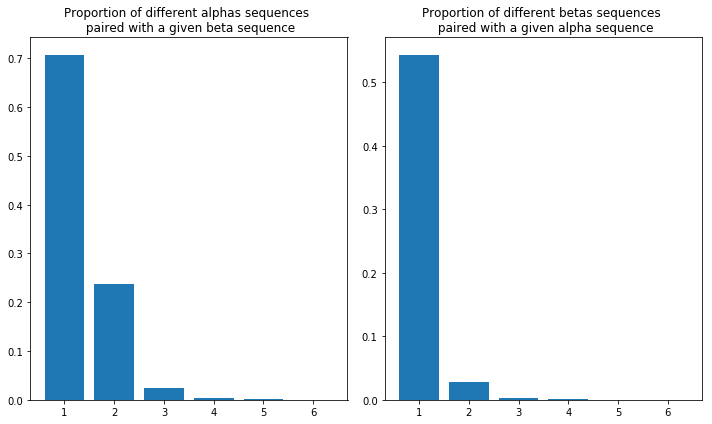

In [6]:


dfbrestr = dfb[(dfb.nb_paired_alphas >= 1) | (dfb.nb_paired_betas >= 1)]
dfarestr = dfa[(dfa.nb_paired_betas >= 1) | (dfb.nb_paired_alphas >= 1)]

fig, axes = plt.subplots(ncols=2, figsize=(10,6))
ax0, ax1 = axes.flatten()

dctb = dfbrestr.nb_paired_alphas.value_counts()
dcta = dfarestr.nb_paired_betas.value_counts()

print(dctb)
print(dcta)

print([u/sum(dcta) for u in dcta])
print([u/sum(dctb) for u in dctb])

tot_b = sum(dctb)
tot_a = sum(dcta)
rge = range(1,7)
ax0.bar(rge, [dctb[u]/tot_b for u in rge])
ax1.bar(rge, [dcta[u]/tot_a for u in rge])
ax1.set_title("Proportion of different betas sequences \n paired with a given alpha sequence")
ax0.set_title("Proportion of different alphas sequences \n paired with a given beta sequence")
plt.tight_layout()
# ax0.set_ylim((0,0.3))
# ax1.set_ylim((0,0.3))
plt.savefig("coactivation_cell_sharing_a_chain_1.pdf")
plt.show()

In [7]:
dfcells["alpha"] = dfcells.cells.apply(lambda x: [a for a in x.split(",") if a[0] == "a"])
dfcells["beta"] = dfcells.cells.apply(lambda x: [a for a in x.split(",") if a[0] == "b"])
dfcells["nb_alpha"] = dfcells.cells.apply(lambda x: len([a for a in x.split(",") if a[0] == "a"]))
dfcells["nb_beta"] = dfcells.cells.apply(lambda x: len([a for a in x.split(",") if a[0] == "b"]))

In [8]:
dfcells.beta

0           [b55727, b739]
1          [b556280, b769]
2         [b414946, b2731]
3         [b8510, b109840]
4         [b10201, b42626]
5        [b313639, b11163]
6        [b12093, b661618]
7        [b16526, b658407]
8        [b20830, b232832]
9        [b561209, b26170]
10       [b33198, b493657]
11        [b42514, b36139]
12       [b238825, b42154]
13       [b42458, b140306]
14       [b42573, b226539]
15       [b42613, b670926]
16       [b43321, b661660]
17       [b49497, b323650]
18       [b52518, b635192]
19       [b59782, b290930]
20       [b610754, b60898]
21       [b219023, b62802]
22       [b314423, b64344]
23       [b66415, b163748]
24       [b67784, b163200]
25       [b69927, b580801]
26       [b554121, b70004]
27       [b70527, b288690]
28       [b328898, b71074]
29       [b73463, b110312]
               ...        
94393            [b399397]
94394    [b672071, b85026]
94395            [b404374]
94396             [b72570]
94397            [b618624]
94398             [b11420]
9

In [9]:


dct = dict()
for c in dfcells.beta.values:
    for b in c:
        if b in dct:
            dct[b] += 1
        else:
            dct[b] = 1
print([a for a in dct if dct[a]>= 2])


[]


In [10]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')